In [230]:
#Import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
from textblob  import TextBlob
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
df = pd.read_csv("TweetSentiments.csv", encoding='utf-8')

In [232]:
df.head(5)

,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [233]:
df.tail(5)

,Id,Category,Tweet
5963,638445576212754433,positive,"Ok ed let's do this, Zlatan, greizmann and Lap..."
5964,638531837313306624,neutral,Goal level: Zlatan 90k by Friday? = Posting e...
5965,639016598477651968,neutral,@YouAreMyArsenal Wouldn't surprise me if we en...
5966,640276909633486849,neutral,Rib injury for Zlatan against Russia is a big ...
5967,640296841725235200,neutral,Noooooo! I was hoping to see Zlatan being Zlat...


In [234]:
df.describe()

,Id,Category,Tweet
count,5968,5968,5968
unique,5962,4,5418
top,637775514896306176,positive,Not Available
freq,2,2888,546


In [0]:
df['Label'] = np.where(df['Category']=='positive','1',(np.where(df['Category']=='negative','-1','0')))

Text(0.5, 0, 'Label')

Text(0.5, 1.0, 'Number of positive negative and neutral messages')

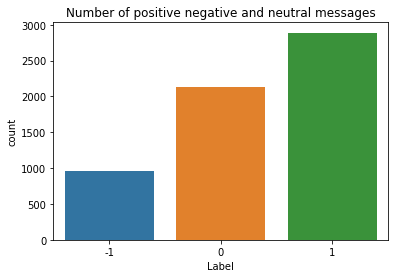

In [236]:
#Explore the class distribution
sns.countplot(df['Label'])
plt.xlabel('Label')
plt.title('Number of positive negative and neutral messages')

In [237]:
tweets_text=[x for x in df['Tweet']]
tweets_text[0:25]

['Not Available',
 'IOS 9 App Transport Security. Mm need to check if my 3rd party network pod supports it http://t.co/fmtcfUAdgj',
 'Mar if you have an iOS device, you should download our app too: http://t.co/gl3tn2uDnD',
 '@jimmie_vanagon my phone does not run on latest IOS which may account for problem the other day .. time it was replaced',
 "Not sure how to start your publication on iOS? We'll be live helping with ask me anything sessions today and Friday http://t.co/KPqqGjjh3x",
 'Two Dollar Tuesday is here with Forklift 2, QuickKey for iOS and Suite for Pages for just $1.99 today:   http://t.co/BNMFOEACw5',
 "If you're not already signed up to test my iOS game, nows your chance! https://t.co/eZhIU6EDpQ",
 'YouTube Gaming Officially Launches On Web, Android, iOS On August 26: YouTube is finally going to r... http://t.co/qbhyA3kaWP #webseries',
 'YouTube Gaming Launches Tomorrow with iOS and Android Apps to Go Head-to-Head with Twitch http://t.co/yZOATToeJC #ios #game',
 "@astrill

In [0]:
corpus=[] #form an empty list called corpus
#Stemming
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stop_words=set(stopwords.words("english"))#remove words such as will,I,and ,at etc.
for tweet in tweets_text:
  tweets_text_cln=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]",' ',tweet)
  tweets_text_cln=re.sub(r'^https?:\/\/.*[\r\n]*', '', tweets_text_cln, flags=re.MULTILINE)
  tweets_text_cln=re.sub(r'^http?:\/\/.*[\r\n]*', '', tweets_text_cln, flags=re.MULTILINE)
  tweets_text_cln=stemmer.stem(tweets_text_cln)
  tweets_text_cln=tweets_text_cln.lower()
  tweets_text_cln=tweets_text_cln.split()
  tweets_text_cln=[x for x in tweets_text_cln if not x in stop_words]
  tweets_text_cln=[x for x in tweets_text_cln if  len(x) > 3]
  tweets_text_cln=" ".join(tweets_text_cln)
  corpus.append(tweets_text_cln)

In [239]:
corpus[0:5]
print(len(corpus))

['avail',
 'transport security need check party network supports',
 'device download',
 'vanagon phone latest account problem time replac',
 'sure start publication live helping anything sessions today friday']

5968


In [240]:
bagofwords=[]
for i in range(len(corpus)):
  words=corpus[i].split()
  bagofwords.append(words)
bagofwords[0:5]

[['avail'],
 ['transport', 'security', 'need', 'check', 'party', 'network', 'supports'],
 ['device', 'download'],
 ['vanagon', 'phone', 'latest', 'account', 'problem', 'time', 'replac'],
 ['sure',
  'start',
  'publication',
  'live',
  'helping',
  'anything',
  'sessions',
  'today',
  'friday']]

In [241]:
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:10])
print()
print("most commonly occuring words abd frequency\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['avail', 'transport', 'security', 'need', 'check', 'party', 'network', 'supports', 'device', 'download']

most commonly occuring words abd frequency



[('tomorrow', 776),
 ('avail', 547),
 ('like', 327),
 ('time', 317),
 ('going', 308),
 ('sunday', 285),
 ('friday', 281),
 ('night', 222),
 ('obama', 207),
 ('jurassic', 196),
 ('want', 195),
 ('world', 194),
 ('monday', 188),
 ('make', 183),
 ('valentine', 182),
 ('trump', 177),
 ('know', 174),
 ('today', 172),
 ('saturday', 169),
 ('think', 162)]

In [0]:
words_to_remove=['nd','th','like','rd','st']

In [243]:
bagofwords_new=[[x for x in word if not x in words_to_remove]for word in bagofwords]
bagofwords_new[0:5]

[['avail'],
 ['transport', 'security', 'need', 'check', 'party', 'network', 'supports'],
 ['device', 'download'],
 ['vanagon', 'phone', 'latest', 'account', 'problem', 'time', 'replac'],
 ['sure',
  'start',
  'publication',
  'live',
  'helping',
  'anything',
  'sessions',
  'today',
  'friday']]

In [244]:
stop_words = ['>>>','and','to','the','for', 'is','of', '#','=','a','in','The', 'i', 'I', 'they', 'you', 'i', 'we', 'that', 'have','our', 'it', 'it’s','are','they','but','this', 'not', 'going', 'be', 'he', 'we’re', 'all', 'because']
bagofwords_new=[[x for x in word if not x in words_to_remove]for word in bagofwords]
bagofwords_new[0:5]

[['avail'],
 ['transport', 'security', 'need', 'check', 'party', 'network', 'supports'],
 ['device', 'download'],
 ['vanagon', 'phone', 'latest', 'account', 'problem', 'time', 'replac'],
 ['sure',
  'start',
  'publication',
  'live',
  'helping',
  'anything',
  'sessions',
  'today',
  'friday']]

In [245]:
all_words=list(itertools.chain(*bagofwords_new))
print(all_words[0:10])
print()
print("MOST COMMONLY OCCURING WORDS AND FREQUENCY\n")
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['avail', 'transport', 'security', 'need', 'check', 'party', 'network', 'supports', 'device', 'download']

MOST COMMONLY OCCURING WORDS AND FREQUENCY



[('tomorrow', 776),
 ('avail', 547),
 ('time', 317),
 ('going', 308),
 ('sunday', 285),
 ('friday', 281),
 ('night', 222),
 ('obama', 207),
 ('jurassic', 196),
 ('want', 195),
 ('world', 194),
 ('monday', 188),
 ('make', 183),
 ('valentine', 182),
 ('trump', 177),
 ('know', 174),
 ('today', 172),
 ('saturday', 169),
 ('think', 162),
 ('watch', 161)]

In [246]:
freq_word_df=pd.DataFrame(words_freq.most_common(20),columns=['words','freq'])
freq_word_df.head(5)

,words,freq
0,tomorrow,776
1,avail,547
2,time,317
3,going,308
4,sunday,285


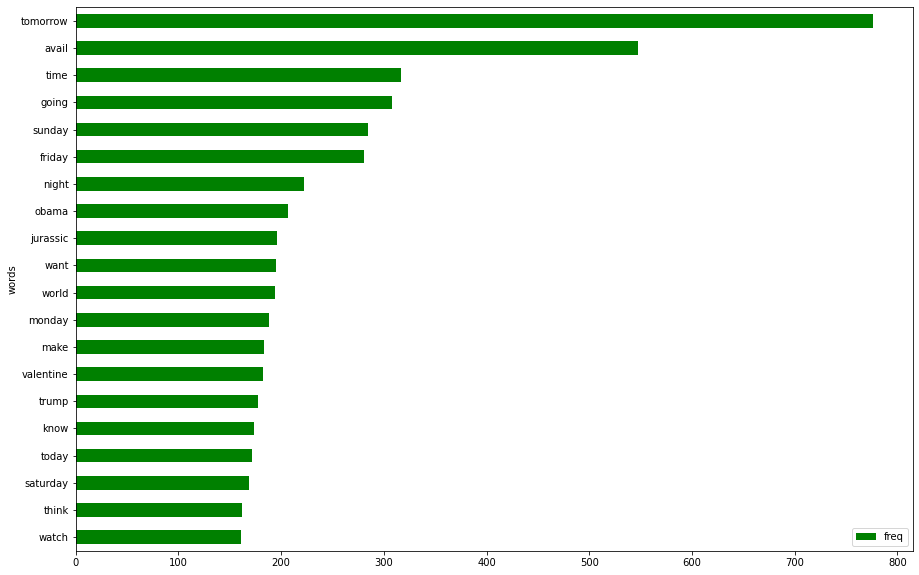

In [247]:
fig,ax=plt.subplots(figsize=(15,10))
freq_word_df.sort_values(by='freq').plot.barh(x='words',y='freq',ax=ax,color='green')
plt.show()

In [0]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=" ".join(freq_word_df.words)
wordcloud=WordCloud(stopwords=STOPWORDS,background_color='black',max_words=20).generate(word_string)

In [249]:
plt.figure(figsize=(25,50))
plt.clf()

<Figure size 1800x3600 with 0 Axes>

<Figure size 1800x3600 with 0 Axes>

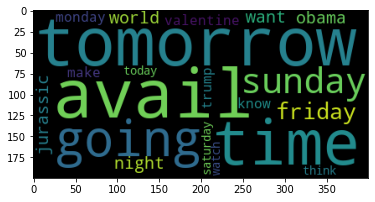

In [250]:
plt.imshow(wordcloud)

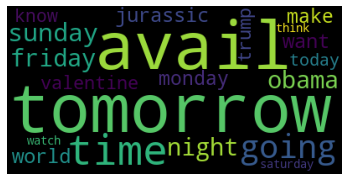

In [251]:
def plot_wordcloud(wordcloud):
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("amp")
stopwords.add("go")
wordcloud = WordCloud(stopwords=stopwords, relative_scaling=1.0).generate(word_string)
plot_wordcloud(wordcloud)

In [252]:
#Bag of words
docs = freq_word_df.words
#Identify the unique words
###For eack row, tokenize
unique_words = []
for row in docs:
    tokens = row.split()
    for token in tokens:
        if token in unique_words:
            pass
        else:
            unique_words.append(token)
print(unique_words)          

bow = []
for row in docs:
    doc_to_bow = []
    tokens = row.split()
    for word in unique_words:
        if word in tokens:
            doc_to_bow.append(1)
        else:
            doc_to_bow.append(0) 
    bow.append(doc_to_bow)
print(docs)
print(bow)

['tomorrow', 'avail', 'time', 'going', 'sunday', 'friday', 'night', 'obama', 'jurassic', 'want', 'world', 'monday', 'make', 'valentine', 'trump', 'know', 'today', 'saturday', 'think', 'watch']
0      tomorrow
1         avail
2          time
3         going
4        sunday
5        friday
6         night
7         obama
8      jurassic
9          want
10        world
11       monday
12         make
13    valentine
14        trump
15         know
16        today
17     saturday
18        think
19        watch
Name: words, dtype: object
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 

In [253]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
# list of text documents
text = all_words
# create the transform
vectorizer = TfidfVectorizer(max_features=20)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
# Get first N items in dictionary  
out = dict(itertools.islice(vectorizer.vocabulary_.items(), 10)) 
# printing result   
print("Dictionary limited by 10 elements is : " + str(out))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=20,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

Dictionary limited by 10 elements is : {'avail': 0, 'time': 12, 'today': 13, 'friday': 1, 'going': 2, 'tomorrow': 14, 'saturday': 9, 'know': 4, 'want': 17, 'make': 5}


In [254]:
print(vectorizer.idf_)

[5.4794704  6.14383862 6.05240441 6.50254196 6.62095972 6.57080993
 6.54399867 6.37857392 6.44820761 6.64994725 6.12975388 6.69199549
 6.02369431 6.6324541  5.13030534 6.60396214 6.57625954 6.50763103
 6.69814935 6.51274613]


In [255]:
# encode document
vector = vectorizer.transform([text[0]])
vector

<1x20 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [256]:
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
#Read the lexicon file
lex_file = open("AFINN-111.csv",encoding='cp1252')

In [258]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])# Using islice() + items()  
# Get first N items in dictionary  
out = dict(itertools.islice(lexicons.items(), 10)) 
# printing result   
print("Dictionary limited by 10 elements is : " + str(out))


Dictionary limited by 10 elements is : {'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3}


In [259]:
corpus[0:5]

['avail',
 'transport security need check party network supports',
 'device download',
 'vanagon phone latest account problem time replac',
 'sure start publication live helping anything sessions today friday']

In [260]:
#For each Message
#For each word in Message
#Get the word score 
#Add all the scores and find the ploarity
strength = []
prediction = []
for i in range(len(corpus)):
  message=corpus[i].split()
  score = 0
  for word in message:
      if word in lexicons:
          score = score + lexicons[word]
  strength.append(score)
  if (score > 0):
    prediction.append('positive')
  elif(score==0):
    prediction.append('neutral')
  else:
    prediction.append('negative')

print(strength[0:101])
print(prediction[0:101])

[0, 2, 0, -2, 2, 0, 2, 0, 0, 1, 3, 0, 4, 0, 0, 3, 4, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 5, -2, 1, -5, 0, 3, -4, 4, 1, 0, 0, 1, 0, 5, 0, 0, 1, 2, 3, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 4, 0, 0, 0, 0, 0, -1, 0, 6, 0, 1, 3, 0, 0, 0, 0, 1, 2, 5, 0, 0, 1, 1, -1, 0, 0, 0, 0, 0, 1, 0, -3]
['neutral', 'positive', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 

In [0]:
df['strength'] = strength
df['prediction']= prediction

In [262]:
df.head(5)

,Id,Category,Tweet,Label,strength,prediction
0,635769805279248384,negative,Not Available,-1,0,neutral
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...,0,2,positive
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down...",0,0,neutral
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...,-1,-2,negative
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,1,2,positive


In [263]:
#Explore the results
df.groupby('prediction')['prediction'].count()

prediction
negative    1022
neutral     2840
positive    2106
Name: prediction, dtype: int64

In [264]:
#Explore the results
df.groupby('Category')['Category'].count()

Category
Tweet          1
negative     956
neutral     2123
positive    2888
Name: Category, dtype: int64

In [265]:
pd.crosstab(df['Category'], df['prediction'])

prediction,negative,neutral,positive
Category,,,
Tweet,0,1,0
negative,383,366,207
neutral,401,1113,609
positive,238,1360,1290


In [266]:
pd.crosstab(df['prediction'], df['Category'])

Category,Tweet,negative,neutral,positive
prediction,,,,
negative,0,383,401,238
neutral,1,366,1113,1360
positive,0,207,609,1290


In [0]:
#Create the neutral only data set
df_positive = df[df['Category']=='positive']

In [268]:
df_positive.head(5)

,Id,Category,Tweet,Label,strength,prediction
4,636100906224848896,positive,Not sure how to start your publication on iOS?...,1,2,positive
10,636440904967061504,positive,Parkrun app for iOS downloaded Where have you ...,1,3,positive
11,636484190050119681,positive,"Today @YouTubeGaming launches, with apps for i...",1,0,neutral
12,636567666048794624,positive,Got a project you want to work on? Need help w...,1,4,positive
13,636724154260176896,positive,"Met with iOS Developer today. We may have a ""g...",1,0,neutral


(-0.5, 1199.5, 999.5, -0.5)

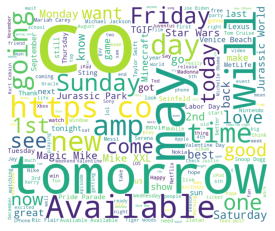

In [269]:
#Visualize the world cloud 
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df_positive['Tweet']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
#Create the neutral only data set
df_neutral = df[df['Category']=='neutral']

(-0.5, 1199.5, 999.5, -0.5)

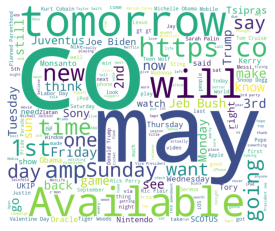

In [271]:
#Visualize the world cloud 
#Concatenate all the words in data to form a string
str_data = " "
data_dump = df_neutral['Tweet']
for record in data_dump:
    str_data = str_data + " " + record

wordcloud = WordCloud(    stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(str_data)


plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [0]:
lexicons['tomorrow']=2
lexicons['CO']=3
lexicons['Available']=3
lexicons['will']=1
lexicons['may']=2
lexicons['https']=3

In [273]:
#For each Message
#For each word in Message
#Get the word score 
#Add all the scores and find the ploarity
strength = []
prediction = []
for i in range(len(corpus)):
  message=corpus[i].split()
  score = 0
  for word in message:
      if word in lexicons:
          score = score + lexicons[word]
  strength.append(score)
  if (score > 0):
    prediction.append('positive')
  elif(score==0):
    prediction.append('neutral')
  else:
    prediction.append('negative')

print(strength[0:101])
print(prediction[0:101])

[0, 2, 0, -2, 2, 0, 2, 0, 2, 1, 3, 0, 4, 0, 0, 3, 4, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 5, -2, 1, -5, 0, 3, -4, 4, 1, 0, 0, 1, 0, 5, 0, 0, 1, 2, 3, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 4, 0, 0, 0, 0, 0, -1, 0, 6, 0, 1, 5, 2, 0, 2, 0, 1, 4, 7, 2, 2, 1, 1, -1, 0, 0, 2, 0, 0, 3, 2, -3]
['neutral', 'positive', 'neutral', 'negative', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'positive', 'negative', 'positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'positive', 'neutral', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'positive', 'positive', 'neutral', 'positive', 'neutral', 'positive', 'neutral', 'neutral', 'positive', 'neutral'

In [0]:
df['strength'] = strength
df['prediction']= prediction

In [275]:
pd.crosstab(df['prediction'], df['Category'])

Category,Tweet,negative,neutral,positive
prediction,,,,
negative,0,364,364,214
neutral,1,351,1014,1188
positive,0,241,745,1486


In [276]:
df= pd.read_csv("TweetSentiments.csv", encoding='utf-8')
df.head()


,Id,Category,Tweet
0,635769805279248384,negative,Not Available
1,635930169241374720,neutral,IOS 9 App Transport Security. Mm need to check...
2,635950258682523648,neutral,"Mar if you have an iOS device, you should down..."
3,636030803433009153,negative,@jimmie_vanagon my phone does not run on lates...
4,636100906224848896,positive,Not sure how to start your publication on iOS?...


In [277]:
from sklearn.feature_extraction.text import CountVectorizer
#Create Bag of Words (BoW) using CountVectoriser
f = CountVectorizer(stop_words = 'english',dtype='float')
X = f.fit_transform(df["Tweet"])
df.info()
pd.isnull(df).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5968 entries, 0 to 5967
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        5968 non-null   object
 1   Category  5968 non-null   object
 2   Tweet     5968 non-null   object
dtypes: object(3)
memory usage: 140.0+ KB


Id          0
Category    0
Tweet       0
dtype: int64

In [278]:
#Transform the class_label to 1-0 (recode)
y=df["Category"].map({'negative':-1,'neutral':0,'positive':1})
y= np.nan_to_num(y)
from sklearn.model_selection import train_test_split
#Create train and test samples
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.25, random_state=42)
print([np.shape(X_train), np.shape(X_test)])
print([np.shape(y_train), np.shape(y_test)])

[(4476, 14886), (1492, 14886)]
[(4476,), (1492,)]


In [279]:
#Build a naive Bayesian model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
prediction[0:10]
len(prediction)
pd.isnull(prediction).sum()
pd.isnull(y_test).sum()
y_test[0:10]
len(y_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

array([0., 1., 1., 1., 0., 1., 0., 1., 0., 0.])

1492

0

0

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 1.])

1492

In [280]:
accuracy_score(y_test,prediction)

0.5864611260053619

In [281]:
print(prediction)
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.columns=("category","prediction")
test_df.head()
#Confusionn matrix for Naive Bayes
pd.crosstab(test_df.category, test_df.prediction)

[0. 1. 1. ... 1. 0. 1.]


,category,prediction
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,0.0


prediction,-1.0,0.0,1.0
category,,,
-1.0,67,77,87
0.0,48,198,283
1.0,11,111,610


In [282]:
#Build SVM model
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(X_train, y_train)
prediction = svc.predict(X_test)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [283]:
accuracy_score(y_test,prediction)

0.4906166219839142

In [284]:
print(prediction)
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.columns=("category","prediction")
test_df.head()
#Confusionn matrix for SVM
pd.crosstab(test_df.category, test_df.prediction)

[1. 1. 1. ... 1. 0. 0.]


,category,prediction
0,0.0,1.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0


prediction,-1.0,0.0,1.0
category,,,
-1.0,66,70,95
0.0,86,163,280
1.0,54,175,503


In [0]:
#Topic Modeling using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df["Tweet"])
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
#Create train and test samples
X_train, X_test, y_train, y_test =train_test_split(tfidf, y, test_size=0.25, random_state=42)

In [286]:
#Build a naive Bayesian model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
prediction[0:10]

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

array([1., 1., 1., 1., 0., 1., 0., 1., 0., 1.])

In [287]:
accuracy_score(y_test,prediction)

0.5770777479892761

In [288]:
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.columns=("category","prediction")
test_df.head()
#Confusionn matrix for Naive Bayes
pd.crosstab(test_df.category, test_df.prediction)

,category,prediction
0,0.0,1.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,0.0


prediction,-1.0,0.0,1.0
category,,,
-1.0,10,110,111
0.0,1,191,337
1.0,2,70,660


In [0]:
#Build Random Forest model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [290]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf.fit(X_train, y_train)
prediction = rf.fit(X_train, y_train).predict(X_test)
accuracy_score(y_test,prediction)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

0.4906166219839142

In [291]:
print(prediction)
test_df = pd.DataFrame(y_test)
test_df['predictions'] = prediction
test_df.columns=("category","prediction")
test_df.head()

[1. 1. 1. ... 1. 1. 1.]


,category,prediction
0,0.0,1.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0


In [292]:
#Confusionn matrix for RF
pd.crosstab(test_df.category, test_df.prediction)

prediction,1.0
category,
-1.0,231
0.0,529
1.0,732


In [294]:
#In this experiment NB with 59% accuracy tops the leaderboard followed by SVM with 49% accuracy. 
#Random forests fails to detect the negative and neutral category becoming the poorest fit for the given data.
!jupyter nbconvert MODULE4_ASSIGNMENT_TWEETSET_LEXICON_MODELLING.ipynb

[NbConvertApp] Converting notebook MODULE4_ASSIGNMENT_TWEETSET_LEXICON_MODELLING.ipynb to html
[NbConvertApp] Writing 821116 bytes to MODULE4_ASSIGNMENT_TWEETSET_LEXICON_MODELLING.html
